In [3]:
# Import the necceasary packages

# Numerical Operations
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Date
import datetime as dt

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

# for better visualization
plt.style.use('ggplot')

# for hypothesis testing
import scipy.stats as stats


### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [4]:
claim_data = pd.read_csv("F:\PYTHON DATASCIENCE\insurance case study\claims.csv")
cust_data = pd.read_csv("F:\PYTHON DATASCIENCE\insurance case study\cust_demographics.csv")
data=pd.merge(left=claim_data,right=cust_data,how='inner',left_on ='customer_id',right_on = 'CUST_ID')
data


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and theirbusiness significance.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [6]:
data.shape

(1085, 16)

In [7]:
data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [8]:
# claim_date and DateOfBirth has Object data type. but it should have Datetime data type.
# converting to Datetime data type.

data.claim_date=pd.to_datetime(data.claim_date)
data.DateOfBirth=pd.to_datetime(data.DateOfBirth)
data.DateOfBirth=np.where(data.DateOfBirth.astype(str).str[2:4].astype(int) <=71,data.DateOfBirth-pd.DateOffset(years=100),data.DateOfBirth)
data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [9]:
# CUST_ID and customer_id are both same. therefore dropping one column i.e.CUST_ID

data=data.drop(columns='CUST_ID')
data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,$1770,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,$2800,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,$33080,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,$2840,4.0,No,Female,1964-10-22,LA,469-345-5617,Silver


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [11]:
data.claim_amount=data.claim_amount.str.replace('$',' ').apply(pd.to_numeric)
data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22,LA,469-345-5617,Silver


In [12]:
data.claim_amount.dtypes

dtype('float64')

# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [13]:
data.police_report.value_counts()

No         621
Unknown    296
Yes        168
Name: police_report, dtype: int64

In [14]:
data['alert flag']=np.where(data.police_report=='Yes','1',(np.where(data.police_report=='No','0',np.nan)))
data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,nan
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22,LA,469-345-5617,Silver,0


## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
## Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [15]:
(data.sort_values(by='claim_date')).groupby(['customer_id']).last()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert flag
customer_id,,,,,,,,,,,,,,,
154557,69348631,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0
263204,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0
287476,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,nan
441097,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,1
524545,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99674324,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,Male,1965-01-28,UT,517-562-4916,Silver,0
99723844,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,Female,1966-06-19,HI,457-752-1374,Gold,1
99761663,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,Female,1963-11-18,NC,643-246-4718,Silver,0


# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [16]:
data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
alert flag              0
dtype: int64

In [17]:
data.claim_amount=data.claim_amount.fillna(data.claim_amount.median())
data.total_policy_claims=data.total_policy_claims.fillna(data.total_policy_claims.median())

In [18]:
data.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
alert flag             0
dtype: int64

# 7. Calculate the age of customers in years. Based on the age, categorize the
### customers according to the below criteria
### Children < 18             
### Youth 18-30             
### Adult 30-60                 
### Senior > 60

In [19]:
data['Age']=((data.claim_date-data.DateOfBirth)/np.timedelta64(1,'Y')).round()
data['Category']=np.where(data.Age>60,'Senior',np.where(data.Age>30,'Adult',np.where(data.Age>18,'Youth','Children')))


# 8. What is the average amount claimed by the customers from various segments?

In [20]:
data.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12258.941333
Platinum,11938.871547
Silver,11425.748563


# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [21]:
dt.datetime(2018,10,1)-dt.timedelta(days=20)

datetime.datetime(2018, 9, 11, 0, 0)

In [22]:
data.query('claim_date <= "2018-09-11"').claim_amount.sum()

11838070.5

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [23]:
data.query('State in ["TX","DE","AK"] and Category=="Adult"').groupby('State')[['Category']].count()

,Category
State,
AK,13
DE,15
TX,15


# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

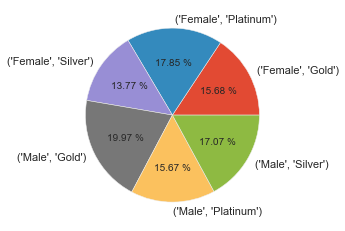

In [24]:
a=data.groupby(['gender','Segment'])[['claim_amount']].sum()
plt.pie(a.claim_amount,labels=a.index,autopct='%0.2f %%')
plt.show()

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [25]:
data.incident_cause.value_counts()

Other causes          285
Driver error          261
Other driver error    245
Natural causes        186
Crime                 108
Name: incident_cause, dtype: int64

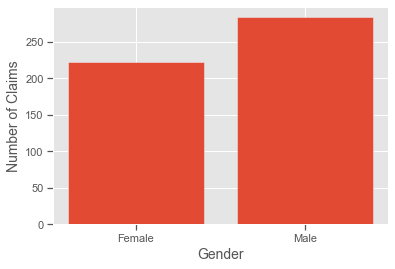

In [26]:
Q12=data.query("incident_cause in ['Driver error','Other driver error']").groupby('gender')[['incident_cause']].count()
plt.bar(Q12.index,Q12.incident_cause)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Number of Claims',fontsize=14)
plt.show()


# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

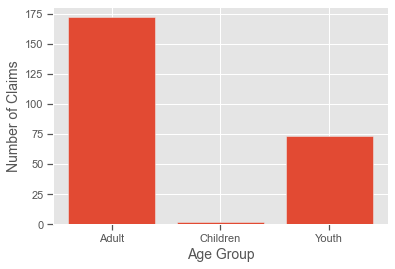

In [27]:
Q13=data.query('fraudulent=="Yes"').groupby('Category')[['fraudulent']].count()
plt.bar(Q13.index,Q13.fraudulent)
plt.xlabel('Age Group',fontsize=14)
plt.ylabel('Number of Claims',fontsize=14)
plt.show()

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

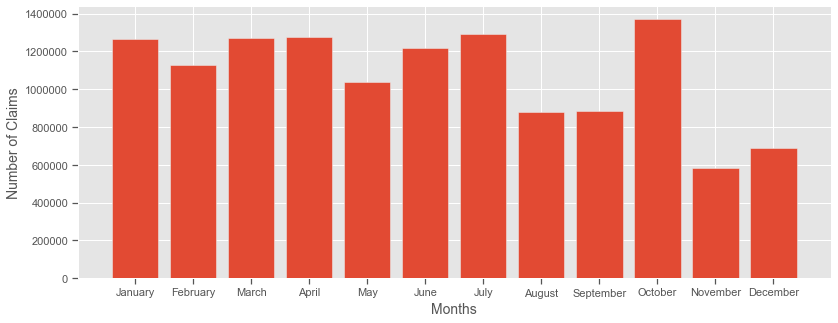

In [28]:
Q14=data.groupby(data.claim_date.dt.month_name())[['claim_amount']].sum().T
Q14=Q14[['January','February','March','April','May','June','July','August','September','October','November','December']].T
plt.figure(figsize=(13.5,5))
plt.bar(Q14.index,Q14.claim_amount)
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Months',fontsize=14)
plt.ylabel('Number of Claims',fontsize=14)
plt.show()

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

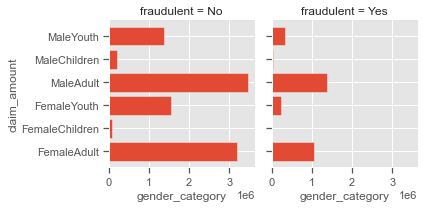

In [29]:
Q15=data.groupby(['fraudulent','gender','Category'])[['claim_amount']].sum().reset_index()
Q15['gender_category']=Q15.gender+Q15.Category
d=sns.FacetGrid(Q15,col='fraudulent')
d.map(plt.barh,'gender_category','claim_amount')
plt.show()


# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

## 16. Is there any similarity in the amount claimed by males and females?

In [30]:
male=data.query('gender=="Male"').claim_amount
female=data.query('gender=="Female"').claim_amount

In [31]:
male.mean()

12223.208633093525

In [32]:
female.mean()

11529.359168241966

In [33]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=0.8422524203324223, pvalue=0.3998326311098064)

# 17. Is there any relationship between age category and segment?

In [34]:
stats.chi2_contingency(pd.crosstab(data.Category,data.Segment))

(1.1613460959114734,
 0.8844207996497491,
 4,
 array([[254.37788018, 245.559447  , 236.06267281],
        [  7.25806452,   7.00645161,   6.73548387],
        [113.3640553 , 109.43410138, 105.20184332]]))

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [35]:
data.claim_amount.mean()

11884.917050691245

In [36]:
stats.ttest_1samp(data.claim_amount,10000)

Ttest_1sampResult(statistic=4.578170709226267, pvalue=5.233071884881618e-06)

# 19. Is there any difference between age groups and insurance claims?

In [37]:
Adult_claim_amount=data.query('Category=="Adult"').claim_amount
Youth_claim_amount=data.query('Category=="Youth"').claim_amount
Children_claim_amount=data.query('Category=="Children"').claim_amount

In [38]:
Adult_claim_amount.mean()

12329.341032608696

In [39]:
Youth_claim_amount.mean()

10683.469512195123

In [40]:
Children_claim_amount.mean()

15074.380952380952

In [41]:
stats.f_oneway(Adult_claim_amount,Youth_claim_amount,Children_claim_amount)

F_onewayResult(statistic=2.268381364379762, pvalue=0.1039714412624388)

# 20. Is there any relationship between total number of policy claims and the claimed amount?

In [42]:
stats.pearsonr(data.total_policy_claims,data.claim_amount)

(-0.016068558048399968, 0.5970054601981295)